In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve,
    roc_auc_score, auc, precision_recall_curve, average_precision_score
)
import seaborn as sns
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [2]:
with open('subway_xgb_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [3]:
df = pd.read_csv('subway_data.csv')

/var/folders/8v/myv9ql5d1lg4ct7vbb0zh8000000gn/T/ipykernel_29121/3465588889.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('subway_data.csv')


In [4]:
df.head()

,station_complex_id,year,month,day,hour,busyness_rank
0,8,2022,2,0,0,5
1,8,2022,2,0,1,5
2,8,2022,2,0,2,5
3,8,2022,2,0,3,5
4,8,2022,2,0,4,5


In [5]:
df['busyness_rank'] = df['busyness_rank'] - 1

In [6]:
df['busyness_rank'].unique()

array([4, 3, 2, 1, 0])

In [7]:
mapping = {'TRAM1': 1, 'TRAM2': 2}
df['station_complex_id'] = df['station_complex_id'].replace(mapping)

df['station_complex_id'] = df['station_complex_id'].astype('category')
df['day'] = df['day'].astype('category')
df['hour'] = df['hour'].astype('category')
df['year'] = df['year'].astype('category')
df['month'] = df['month'].astype('category')

In [8]:
features = df.drop('busyness_rank', axis=1)
target = df['busyness_rank']

In [9]:
predictions = model.predict(features)

In [10]:
classes = [0, 1, 2, 3, 4]  # Adjust based on the actual classes
n_classes = len(classes)

# Binarize the output
y_test_bin = label_binarize(target, classes=classes)
y_pred_bin = label_binarize(predictions, classes=classes)

In [11]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

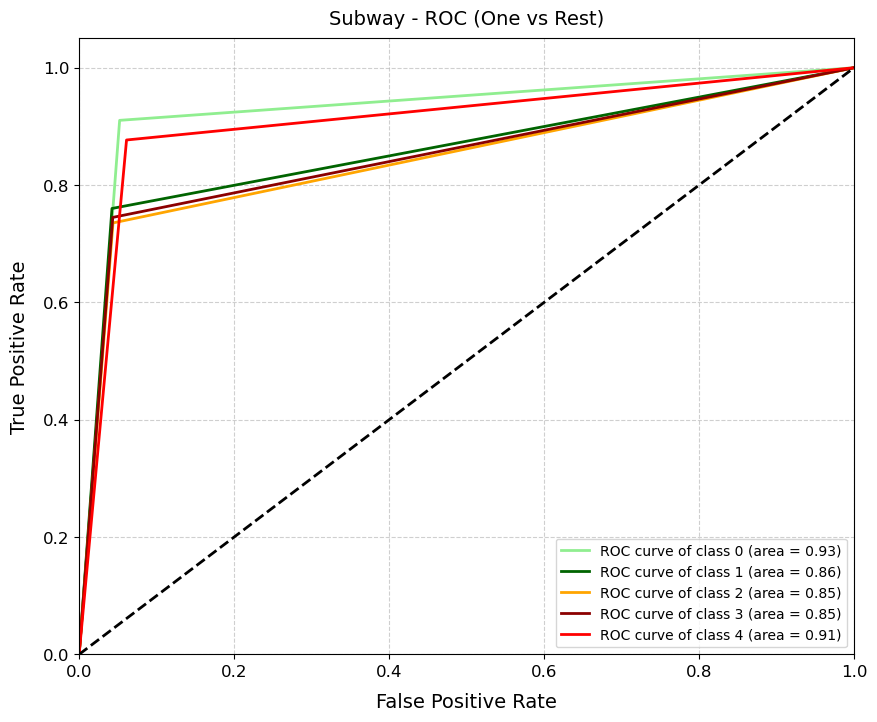

In [12]:
plt.figure(figsize=(10, 8))
colors = cycle(['lightgreen', 'darkgreen', 'orange', 'darkred', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, labelpad=10, color='black')
plt.ylabel('True Positive Rate', fontsize=14, labelpad=10, color='black')
plt.title('Subway - ROC (One vs Rest)', fontsize=14, pad=10)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.style.use('ggplot')
plt.show()